In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
directory = "data"
train_directory = directory + "/train/"
test_directory = directory + "/test/"

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    color_mode="grayscale",
    image_size=(48, 48)
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory, 
    labels = "inferred",
    color_mode="grayscale",
    image_size= (48,48)
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


## Input image shape
`48x48 and 1 channel for grayscale.

In [4]:
if set(train_ds.class_names) - set(test_ds.class_names) == set():
    assert("Missing or extra classes")

In [5]:
class_names = train_ds.class_names
num_classes = len(class_names)

In [6]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 48, 48, 1)
(32,)


` Image batch size and Labels batch size matches.

## Visualizing the data

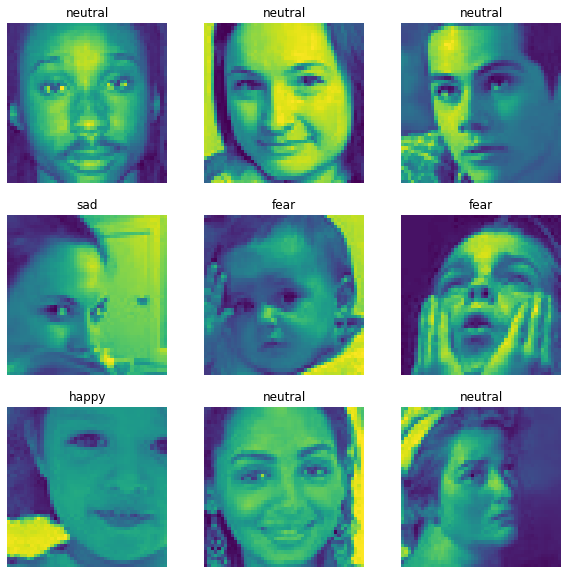

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint64"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

##### Part 2

C:\Users\Samavedam\AppData\Local\Temp\ipykernel_19568\2692651434.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(2, 2))


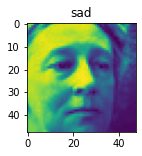

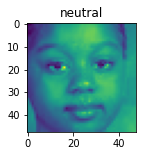

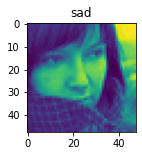

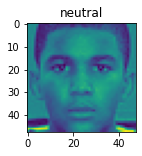

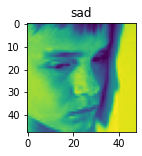

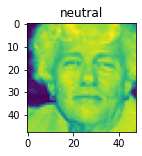

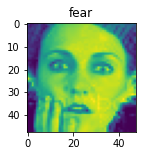

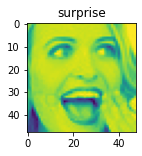

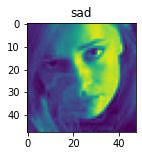

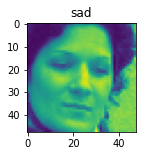

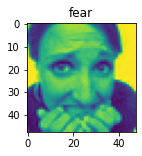

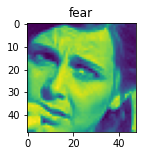

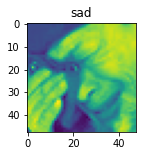

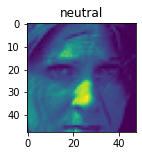

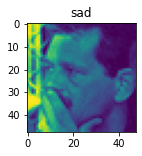

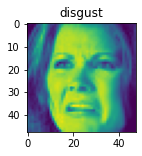

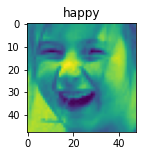

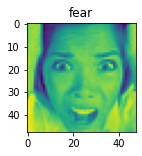

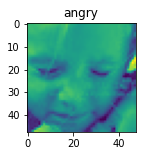

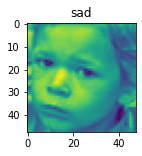

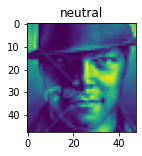

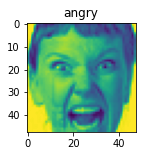

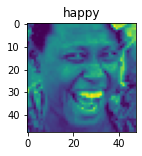

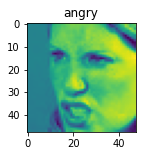

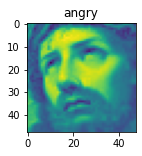

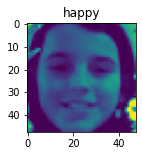

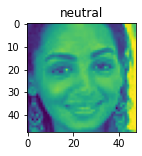

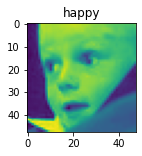

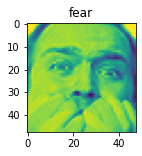

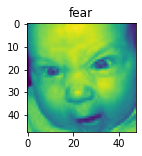

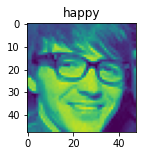

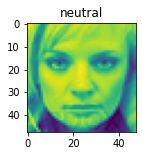

In [8]:
for image_batch, labels_batch in train_ds.take(1):
    samples = image_batch.shape[0]
    for ind in range(samples):
        plt.figure(figsize=(2, 2))
        plt.imshow(image_batch[ind].numpy().astype('uint8'))
        plt.title(class_names[labels_batch[ind]])

In [9]:
num_classes = len(class_names)

##### Data Pre-fetch

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model building

In [22]:
model = models.Sequential()
# model.add(layers.Resizing(48, 48,interpolation='bilinear', crop_to_aspect_ratio=False))
# For ensuring that the images are resized before loading.
model.add(layers.Rescaling(1./255, input_shape=(48,48,1)))
# Normalizing so that the values are in the range of [0,1] for reducing the bias.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# shape = 46 x 46 x 64
model.add(layers.MaxPooling2D((2,2)))
# shape = 23 x 23 x 64
model.add(layers.Conv2D(64, (2,2), activation='relu'))
# shape = 22 x 22 x 64
model.add(layers.MaxPooling2D((2, 2)))
# shape = 11 x 11 x 64
model.add(layers.Conv2D(32, (2, 2), activation="relu"))
# shape = 10 x 10 x 32
model.add(layers.MaxPooling2D((2,2)))
# shape = 5 x 5 x 32

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 64)        16448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 32)       

In [24]:
model.add(layers.Flatten())
# shape = 32*5*5 --> 800
model.add(layers.Dense(128))
model.add(layers.Dense(64))
model.add(layers.Dense(num_classes))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 64)        16448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 32)       

In [15]:
"""
## Adding Convolution layer with 32 filters of size 3, 3 
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)))

## Pooling over 2 x 2
model.add(layers.MaxPooling2D((2, 2)))
## shape = (23, 23, 32)
model.add(layers.Conv2D(64, (4, 4), activation = 'relu'))
## shape = (20, 20, 64)
model.add(layers.MaxPool2D((2,2)))
## shape = (10, 10, 64)
# model.add(layers.Conv2D(16, (3,3), activation='relu'))
# ## shape = (8, 8, 32)
# model.add(layers.MaxPool2D((2,2)))
## shape = (4, 4, 16)
model.add(layers.Flatten())
## shape = (256) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
## shape = 32
# model.add(layers.Dense(1))
## shape = 1
model.summary()
"""

"\n## Adding Convolution layer with 32 filters of size 3, 3 \nmodel.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)))\n\n## Pooling over 2 x 2\nmodel.add(layers.MaxPooling2D((2, 2)))\n## shape = (23, 23, 32)\nmodel.add(layers.Conv2D(64, (4, 4), activation = 'relu'))\n## shape = (20, 20, 64)\nmodel.add(layers.MaxPool2D((2,2)))\n## shape = (10, 10, 64)\n# model.add(layers.Conv2D(16, (3,3), activation='relu'))\n# ## shape = (8, 8, 32)\n# model.add(layers.MaxPool2D((2,2)))\n## shape = (4, 4, 16)\nmodel.add(layers.Flatten())\n## shape = (256) \nmodel.add(layers.Dense(256, activation='relu'))\nmodel.add(layers.Dense(32, activation='relu'))\n## shape = 32\n# model.add(layers.Dense(1))\n## shape = 1\nmodel.summary()\n"

In [16]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 48, 48, 1)
(32,)


In [17]:
# alp

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
# model.compile(optimizer='adam', loss='categorical_crossentropy')

In [27]:
model.fit(train_ds, epochs=30, validation_data=test_ds)

Epoch 1/30
898/898 [==============================] - 49s 54ms/step - loss: 1.6132 - accuracy: 0.3663 - val_loss: 1.4665 - val_accuracy: 0.4479
Epoch 2/30
898/898 [==============================] - 47s 52ms/step - loss: 1.4302 - accuracy: 0.4526 - val_loss: 1.4016 - val_accuracy: 0.4576
Epoch 3/30
898/898 [==============================] - 50s 55ms/step - loss: 1.3535 - accuracy: 0.4810 - val_loss: 1.3447 - val_accuracy: 0.4826
Epoch 4/30
898/898 [==============================] - 56s 63ms/step - loss: 1.2994 - accuracy: 0.5063 - val_loss: 1.3423 - val_accuracy: 0.4844
Epoch 5/30
898/898 [==============================] - 61s 68ms/step - loss: 1.2658 - accuracy: 0.5167 - val_loss: 1.3002 - val_accuracy: 0.5017
Epoch 6/30
898/898 [==============================] - 64s 71ms/step - loss: 1.2371 - accuracy: 0.5313 - val_loss: 1.2835 - val_accuracy: 0.5143
Epoch 7/30
898/898 [==============================] - 60s 67ms/step - loss: 1.2111 - accuracy: 0.5430 - val_loss: 1.2978 - val_accuracy:

In [21]:
for value in test_ds:
    print("Type:",type(value))
    print("Help:",help(value))
    print(value)
    break
#     tf.keras.utils.array_to_img(value)

Type: <class 'tuple'>
Help on tuple object:

class tuple(object)
 |  tuple(iterable=(), /)
 |  
 |  Built-in immutable sequence.
 |  
 |  If no argument is given, the constructor returns an empty tuple.
 |  If iterable is specified the tuple is initialized from iterable's items.
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Built-in subclasses:
 |      asyncgen_hooks
 |      UnraisableHookArgs
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |

In [28]:
import pickle

In [29]:
pickle.dump(model, open('model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://dd481b0c-0ce4-42eb-8ee6-eb3fce1c9442/assets
